<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-09 10:58:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.4MB/s    in 2.8s    

2025-08-09 10:58:31 (54.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



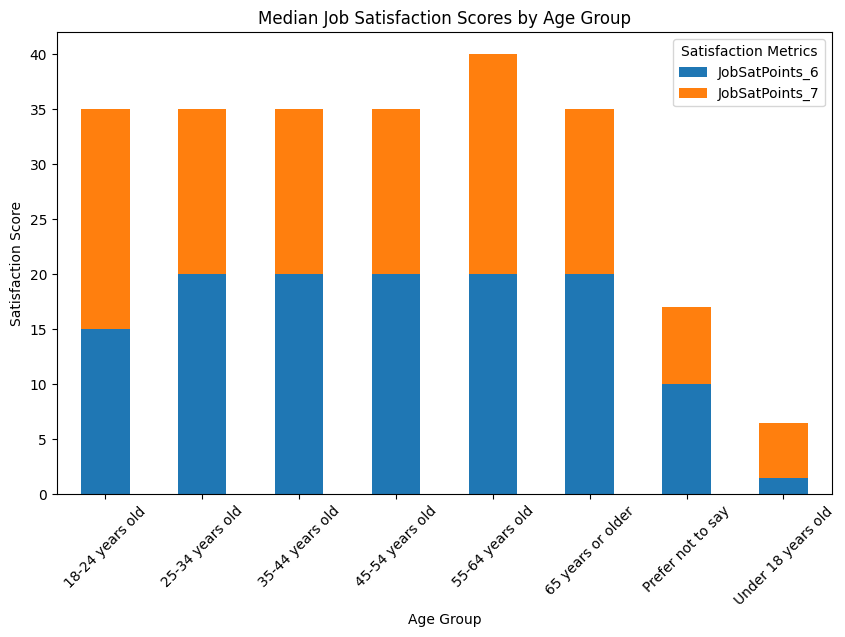

In [7]:
# Group by Age and calculate median satisfaction scores
age_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create stacked bar chart
age_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Median Job Satisfaction Scores by Age Group')
plt.ylabel('Satisfaction Score')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Metrics')
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


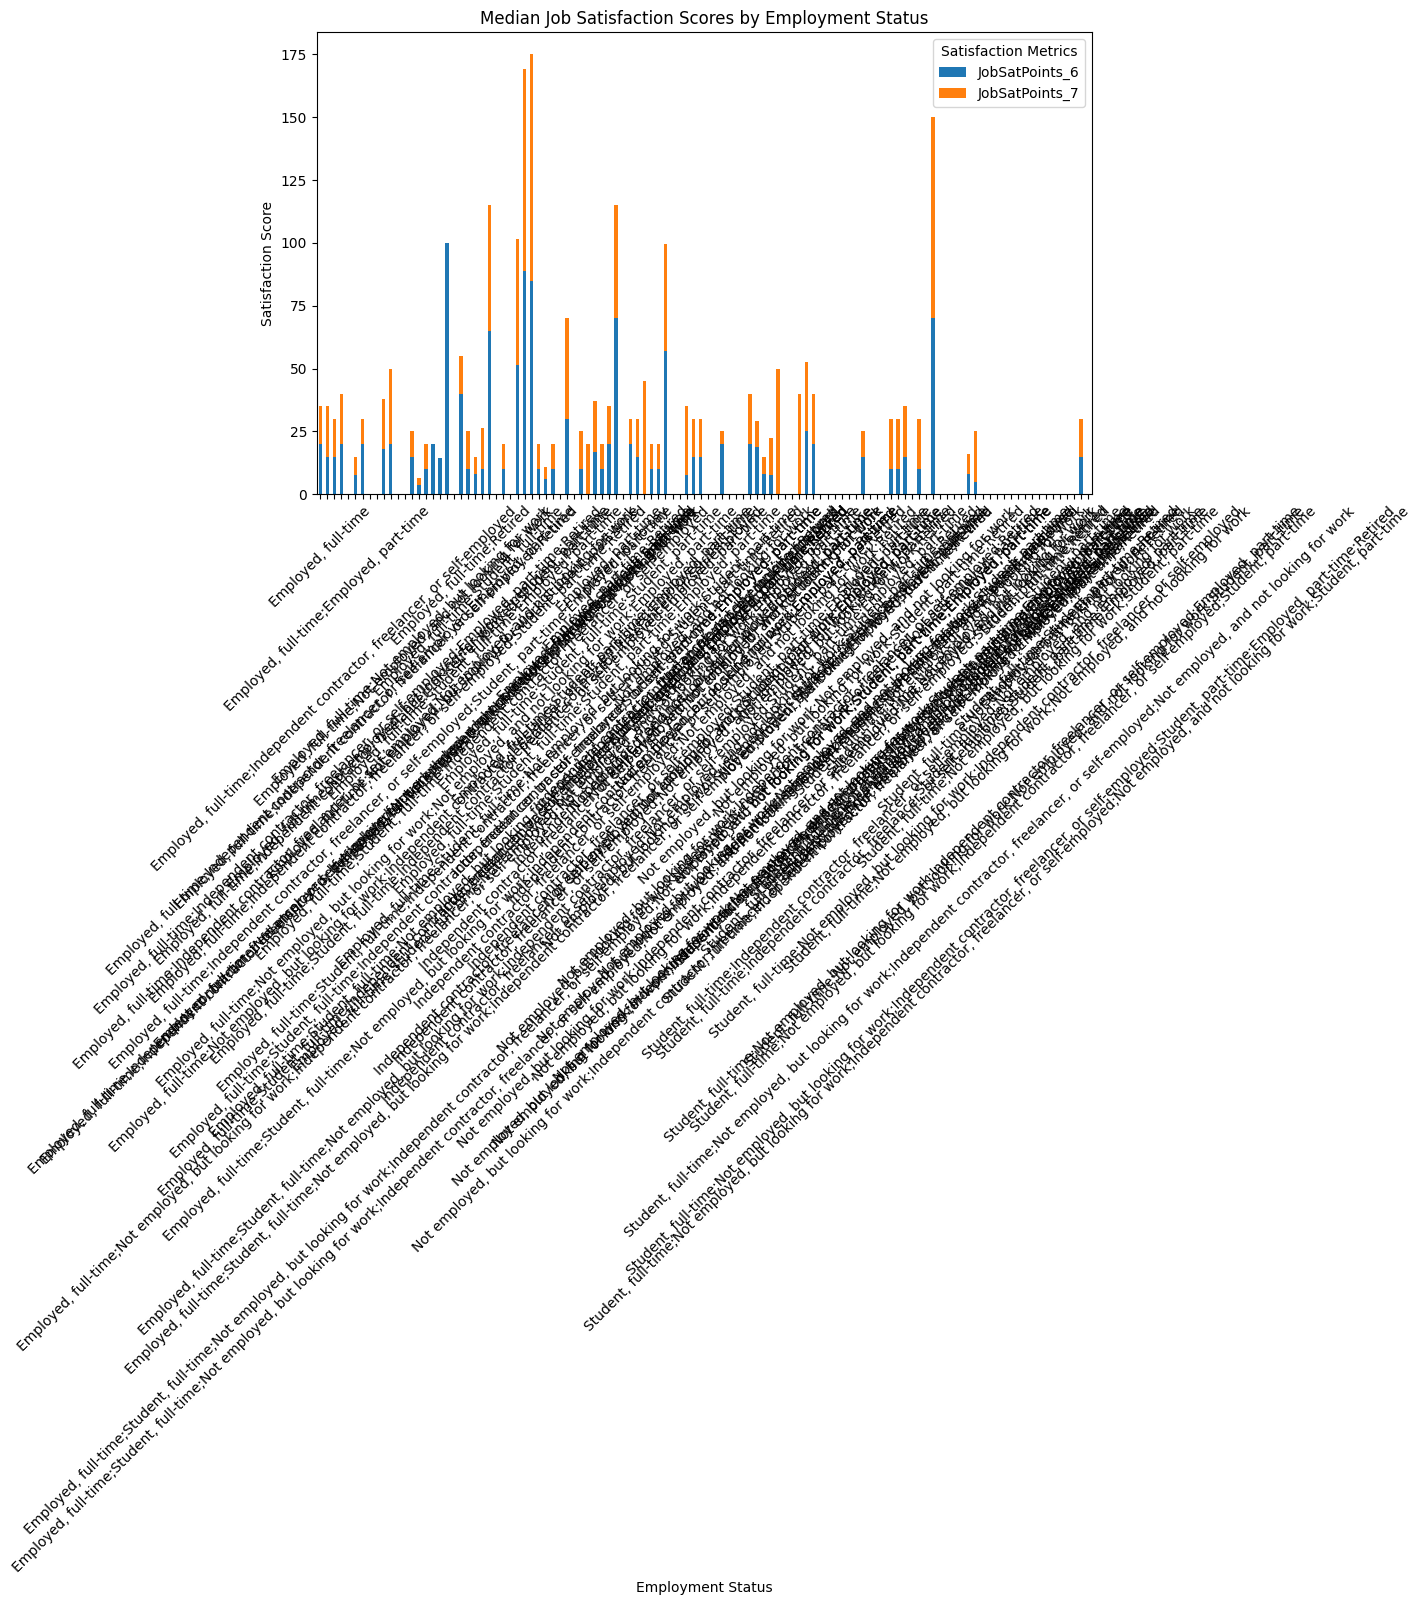

In [14]:
# Group by Employment status and calculate median satisfaction scores
employment_satisfaction = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Create stacked bar chart
employment_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Median Job Satisfaction Scores by Employment Status')
plt.ylabel('Satisfaction Score')
plt.xlabel('Employment Status')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Metrics')
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


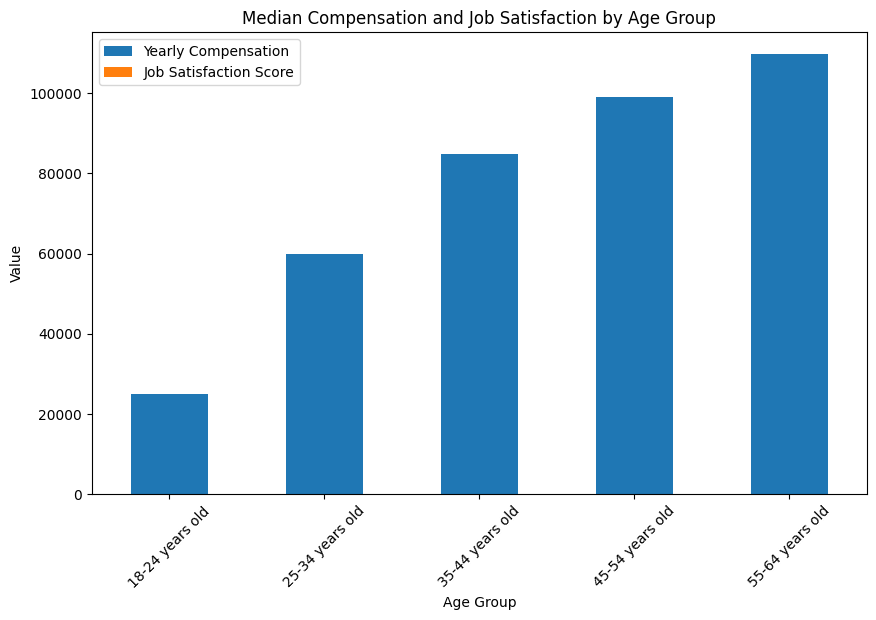

In [17]:
# Get top 5 most common age groups
top_age_groups = df['Age'].value_counts().head(5).index

if len(top_age_groups) == 0:
    print("No age data available")
else:
    # Filter for top age groups
    age_filtered = df[df['Age'].isin(top_age_groups)]
    
    # Group and plot
    (age_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']]
                .median()
                .plot(kind='bar', stacked=True, figsize=(10, 6)))
    plt.title('Median Compensation and Job Satisfaction by Age Group')
    plt.ylabel('Value')
    plt.xlabel('Age Group')
    plt.xticks(rotation=45)
    plt.legend(['Yearly Compensation', 'Job Satisfaction Score'])
    plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_1774/3113865409.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_filtered['NormalizedComp'] = (


<Figure size 1200x700 with 0 Axes>

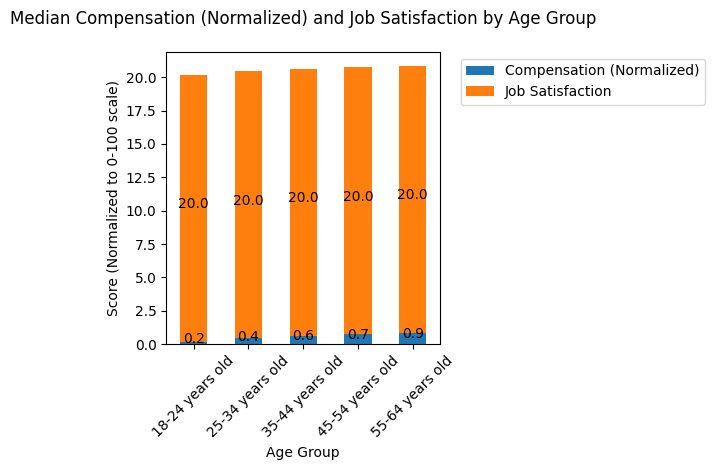

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if required columns exist
required_columns = ['Age', 'ConvertedCompYearly', 'JobSatPoints_6']
if not all(col in df.columns for col in required_columns):
    missing = [col for col in required_columns if col not in df.columns]
    print(f"Missing columns: {missing}")
else:
    # Clean data - remove rows with missing values in our key columns
    plot_data = df[required_columns].dropna()
    
    # Get the top 5 most common age groups (or all if less than 5)
    top_age_groups = plot_data['Age'].value_counts().head(5).index
    
    if len(top_age_groups) == 0:
        print("No age group data available")
    else:
        # Filter for top age groups
        age_filtered = plot_data[plot_data['Age'].isin(top_age_groups)]
        
        # Normalize compensation to be on similar scale as satisfaction (0-100)
        age_filtered['NormalizedComp'] = (
            age_filtered['ConvertedCompYearly'] / 
            age_filtered['ConvertedCompYearly'].max() * 100
        )
        
        # Group by Age and calculate medians
        age_stats = age_filtered.groupby('Age')[['NormalizedComp', 'JobSatPoints_6']].median()
        
        # Create stacked bar chart
        plt.figure(figsize=(12, 7))
        
        # Plot bars
        age_stats.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
        
        # Customize chart
        plt.title('Median Compensation (Normalized) and Job Satisfaction by Age Group', pad=20)
        plt.ylabel('Score (Normalized to 0-100 scale)')
        plt.xlabel('Age Group')
        plt.xticks(rotation=45)
        plt.legend(['Compensation (Normalized)', 'Job Satisfaction'], 
                  bbox_to_anchor=(1.05, 1))
        
        # Add value labels
        for container in plt.gca().containers:
            plt.bar_label(container, fmt='%.1f', label_type='center', padding=3)
        
        plt.tight_layout()
        plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


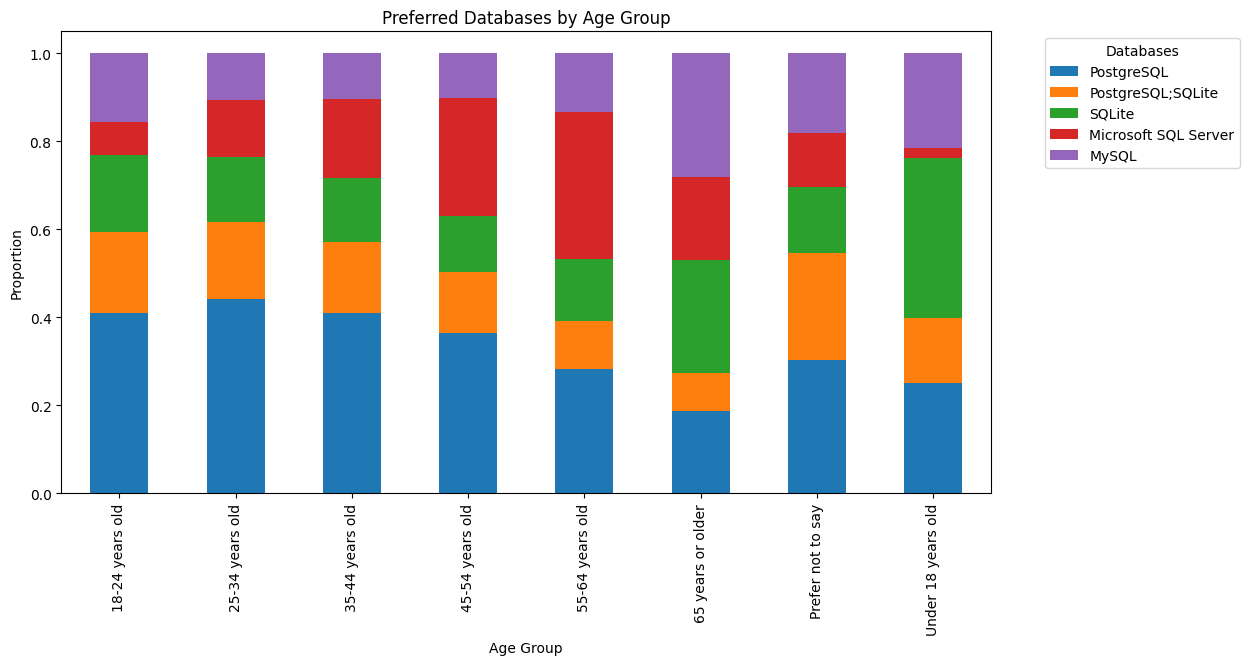

In [19]:
# Get top 5 databases
top_dbs = df['DatabaseWantToWorkWith'].value_counts().head(5).index

# Create cross-tabulation
db_age = pd.crosstab(df['Age'], df['DatabaseWantToWorkWith'])[top_dbs]

# Normalize and plot
(db_age.div(db_age.sum(axis=1), axis=0)
       .plot(kind='bar', stacked=True, figsize=(12, 6)))
plt.title('Preferred Databases by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Databases', bbox_to_anchor=(1.05, 1))
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


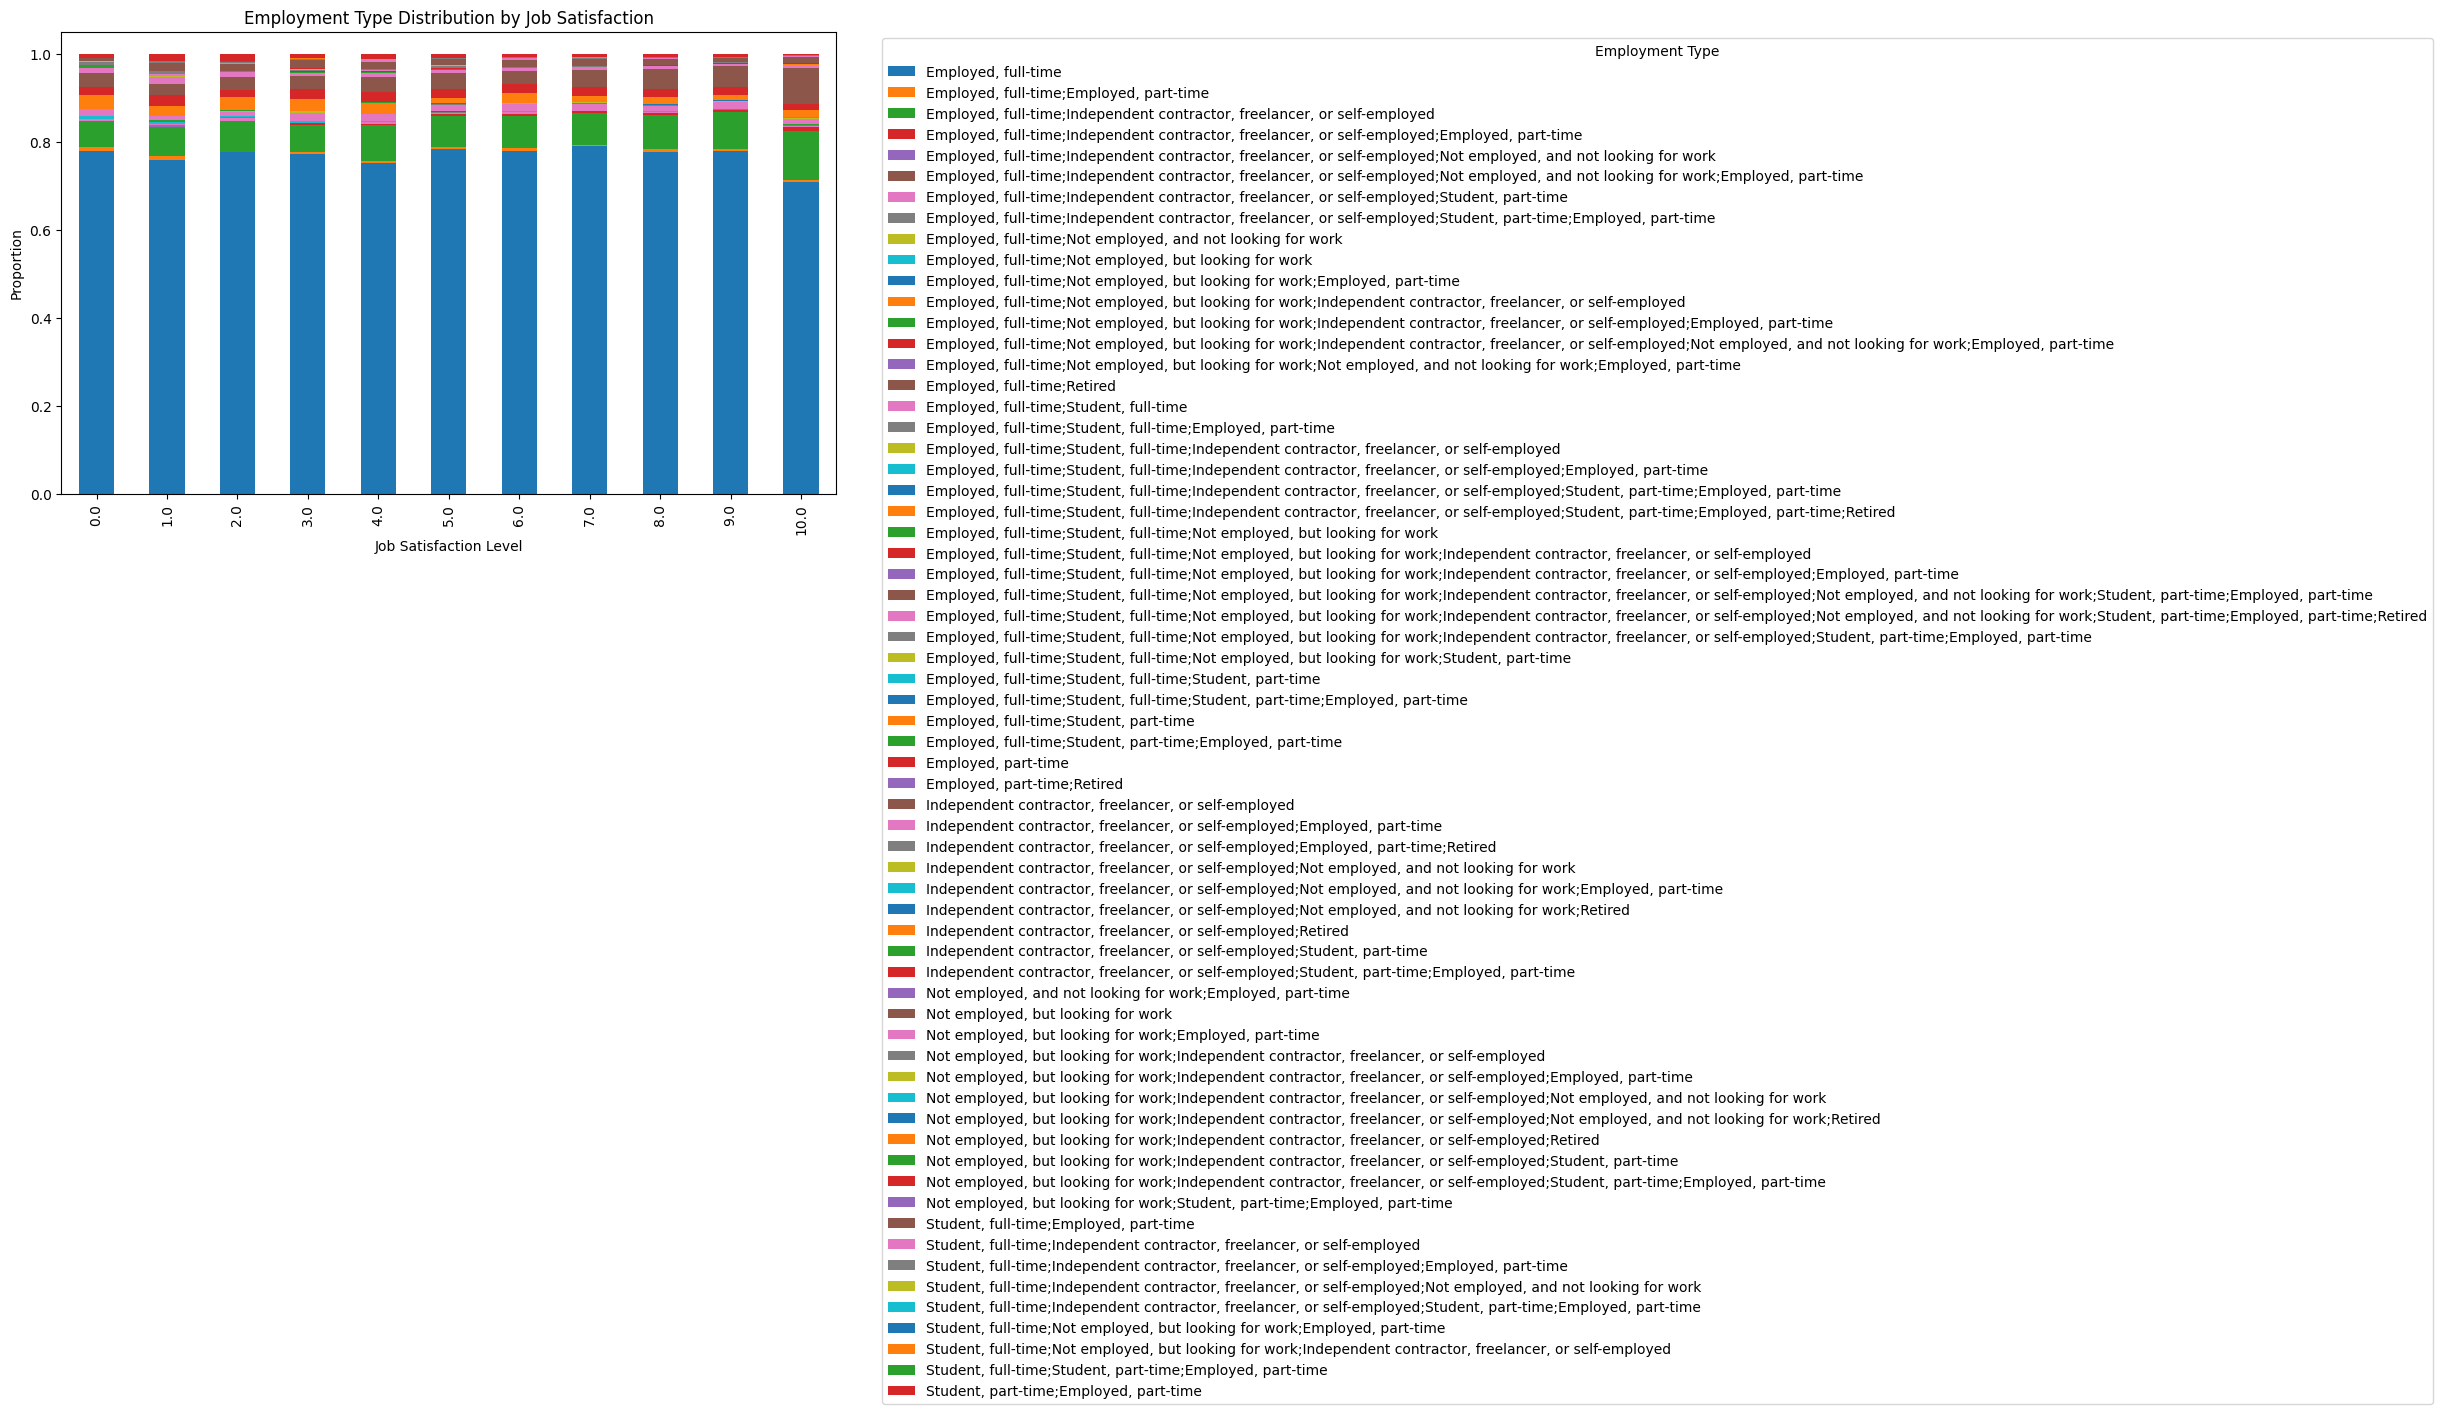

In [20]:
# Create cross-tabulation
employment_jobsat = pd.crosstab(df['JobSat'], df['Employment'])

# Normalize and plot
(employment_jobsat.div(employment_jobsat.sum(axis=1), axis=0)
                  .plot(kind='bar', stacked=True, figsize=(10, 6)))
plt.title('Employment Type Distribution by Job Satisfaction')
plt.ylabel('Proportion')
plt.xlabel('Job Satisfaction Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1))
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


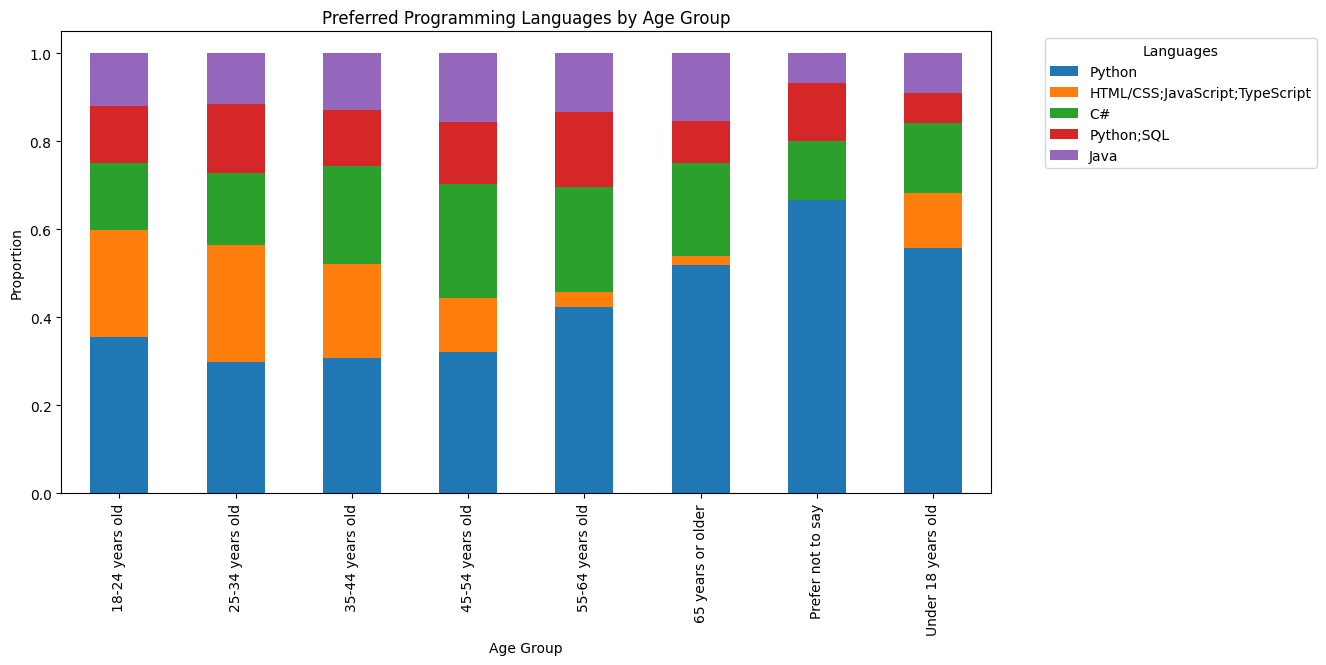

In [21]:
# Get top 5 languages
top_langs = df['LanguageAdmired'].value_counts().head(5).index

# Create cross-tabulation
lang_age = pd.crosstab(df['Age'], df['LanguageAdmired'])[top_langs]

# Normalize and plot
(lang_age.div(lang_age.sum(axis=1), axis=0)
        .plot(kind='bar', stacked=True, figsize=(12, 6)))
plt.title('Preferred Programming Languages by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1))
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


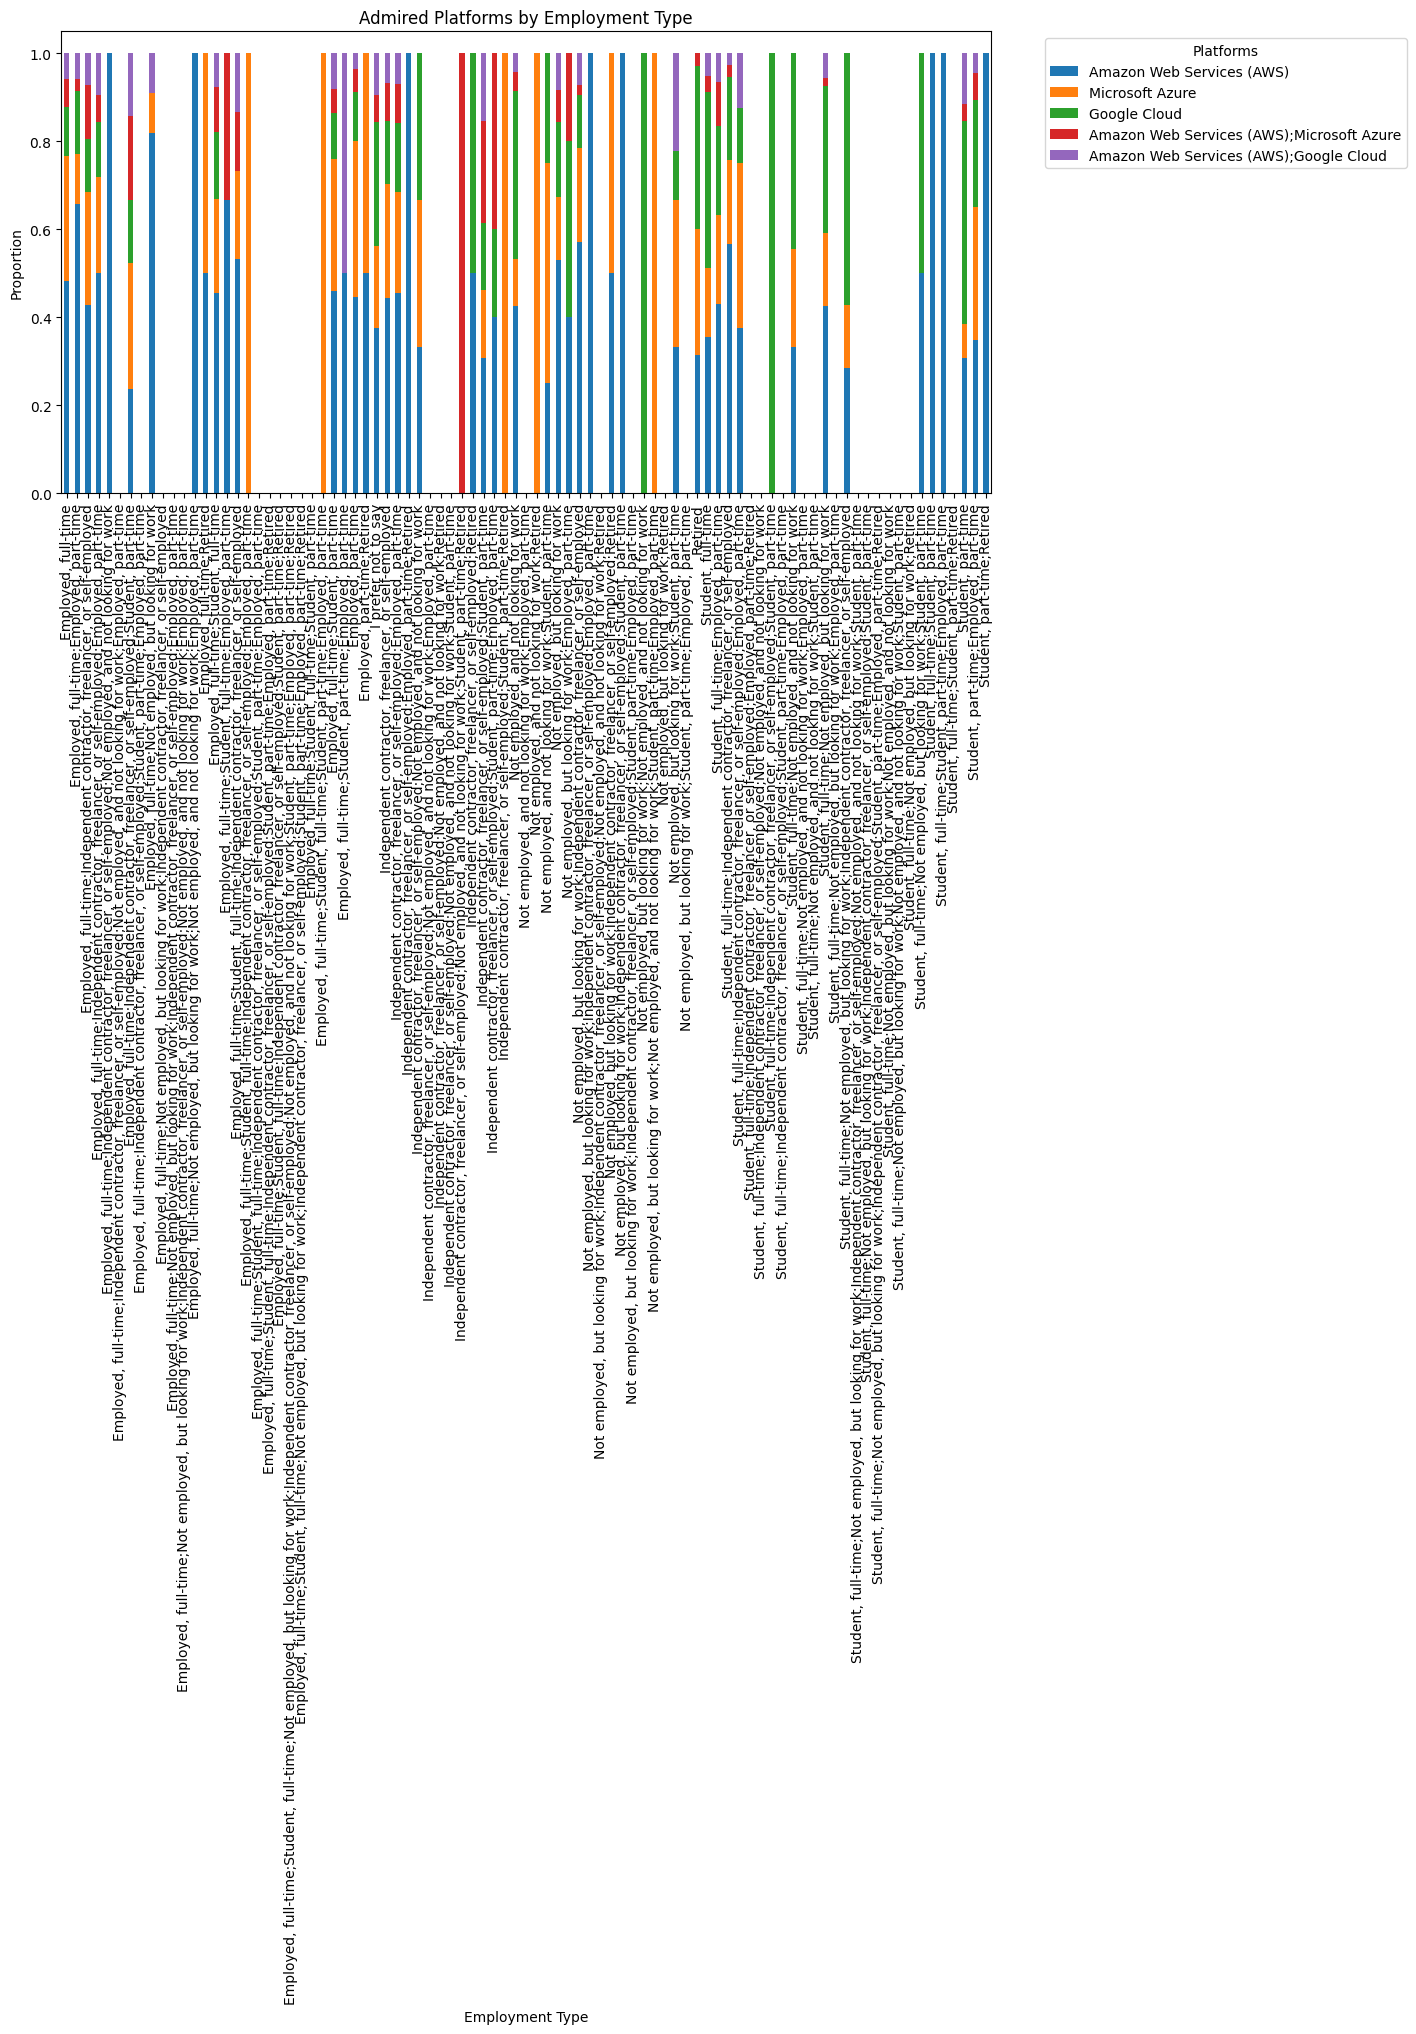

In [22]:
# Get top 5 platforms
top_platforms = df['PlatformAdmired'].value_counts().head(5).index

# Create cross-tabulation
platform_employment = pd.crosstab(df['Employment'], df['PlatformAdmired'])[top_platforms]

# Normalize and plot
(platform_employment.div(platform_employment.sum(axis=1), axis=0)
                    .plot(kind='bar', stacked=True, figsize=(12, 6)))
plt.title('Admired Platforms by Employment Type')
plt.ylabel('Proportion')
plt.xlabel('Employment Type')
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1))
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
